In [ ]:
import pandas as pd
from atom import ATOMClassifier
from atom import ATOMLoader
from numpy import sqrt
from numpy import argmax
import numpy as np
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from scipy import interp

In [2]:
X = pd.read_csv("/data_16_ab.csv", index_col = 0)

X['y'] = [0 if row_name.endswith('H') else 1 for row_name in X.index]

In [3]:
X.head(5)

,CAAGGSQGNLIF,CASSIRSSYEQYF,CAVGGSQGNLIF,CAVNNARLMF,CAVRDSNYQLIW,CAAKEGYSTLTF,CAFKAAGNKLTF,CAGGGSQGNLIF,CVVSDRGSTLGRLYF,CAVMDSNYQLIW,CILDNNNDMRF,CAVLDSNYQLIW,CASSLAPGATNEKLFF,CADRGSTLGRLYF,CASGGSYIPTF,CASSLGETQYF,y
1_A_B_H,0.00000,0.0,0.000081,0.000040,0.000000,0.0,0.0,0.00000,0.000121,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0
1_A_B_OC,0.00000,0.0,0.000040,0.000040,0.000081,0.0,0.0,0.00000,0.000121,0.000081,0.0,0.00004,0.0,0.0,0.0,0.000040,1
10_A_B_H,0.00000,0.0,0.000040,0.000161,0.000000,0.0,0.0,0.00004,0.000161,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000040,0
10_A_B_OC,0.00000,0.0,0.000040,0.000000,0.000000,0.0,0.0,0.00004,0.000040,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,1
11_A_B_H,0.00004,0.0,0.000000,0.000000,0.000040,0.0,0.0,0.00004,0.000362,0.000040,0.0,0.00000,0.0,0.0,0.0,0.000081,0


In [12]:
X.shape

(83, 17)

SFS from 16 to 8 features


In [13]:
solvers = ["LDA", "XGB", "LR", "LGB"]
models = ["GBM", "LR", "LDA", "QDA", "RNN", "AdaB", "RF", "XGB"]

atom = ATOMClassifier(X, y="y", test_size=0.25, verbose=2, warnings=False, random_state = 1, index=True)

for solver in solvers:   
    atom.branch = "sfs_" + solver + "_from_master"
    atom.feature_selection(strategy="SFS", solver=solver, n_features=8, random_state=0, direction = "backward")
        
    models_named = [model + "_" + solver for model in models]
    atom.run(models=models_named, n_calls=50, n_initial_points=10, metric="AUC", n_bootstrap=5)

atom.save("atom_sfs_16f")

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (83, 17)
Memory: 16.70 kB
Scaled: False
Outlier values: 21 (2.0%)
Duplicate samples: 2 (2.4%)
-------------------------------------
Train set size: 63
Test set size: 20
-------------------------------------
|   |    dataset |      train |       test |
| - | ---------- | ---------- | ---------- |
| 0 |   49 (1.4) |   37 (1.4) |   12 (1.5) |
| 1 |   34 (1.0) |   26 (1.0) |    8 (1.0) |

New branch sfs_LDA successfully created.
Fitting FeatureSelector...
Performing feature selection ...
 --> SFS selected 8 features from the dataset.
   >>> Dropping feature CAAGGSQGNLIF.
   >>> Dropping feature CASSIRSSYEQYF.
   >>> Dropping feature CAVNNARLMF.
   >>> Dropping feature CAAKEGYSTLTF.
   >>> Dropping feature CAFKAAGNKLTF.
   >>> Dropping feature CAGGGSQGNLIF.
   >>> Dropping feature CAVMDSNYQLIW.
   >>> Dropping feature CILDNNNDMRF.

Training ==================

In [4]:
atom = ATOMLoader("atom_sfs_16f")
atom.branch = "master"

ATOMClassifier successfully loaded.
Switched to branch master.


In [5]:
atom.winner

XGBoost
 --> Estimator: XGBClassifier
 --> Evaluation: roc_auc: 0.9271

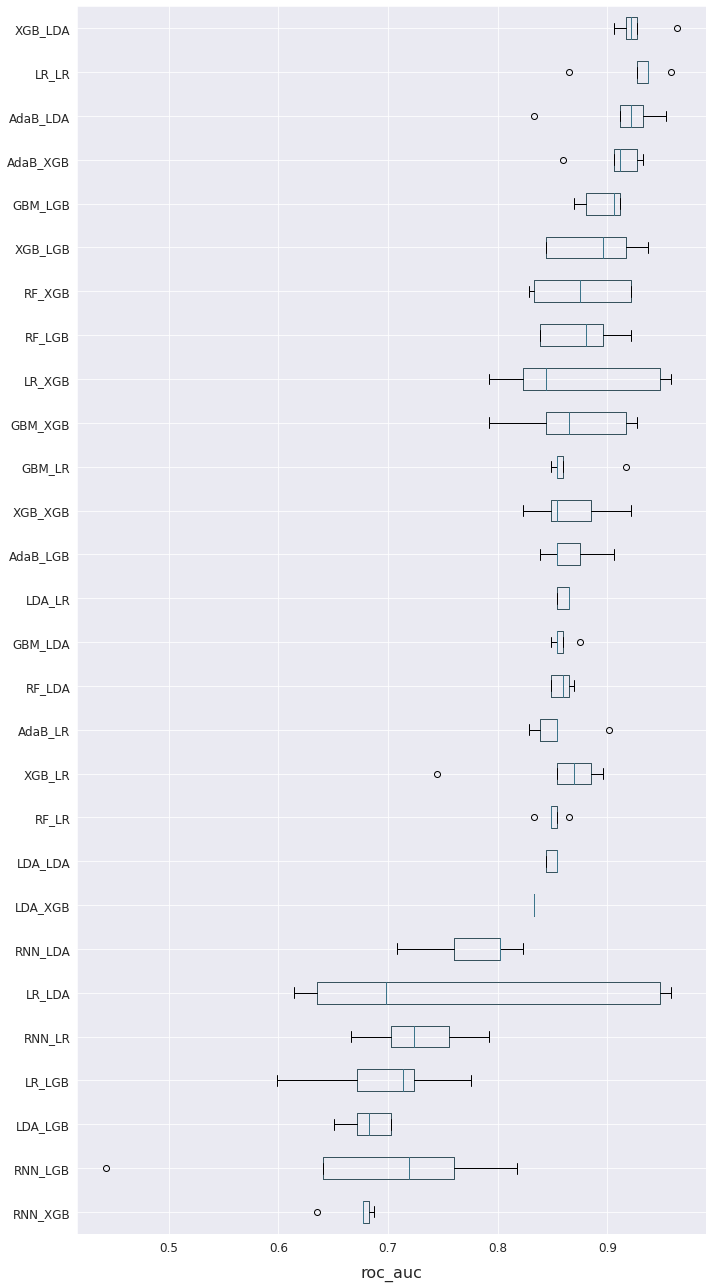

In [44]:
atom.plot_results()

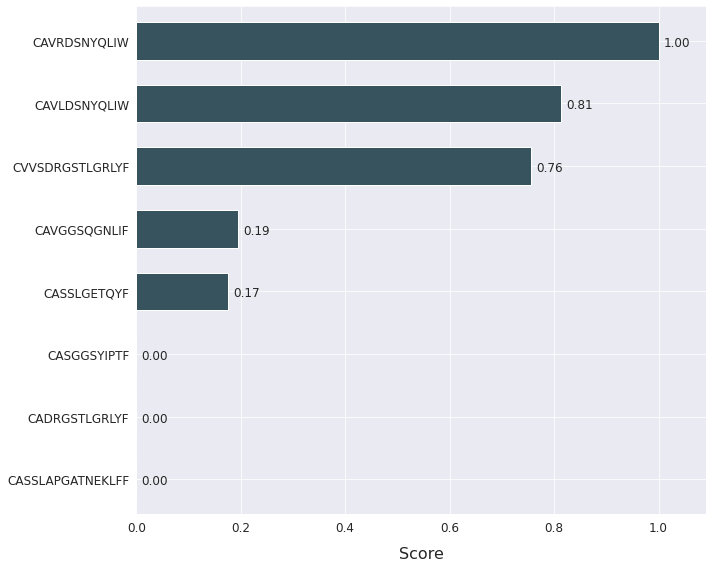

In [15]:
atom.winner.plot_feature_importance()

The above feature importance plot indicates that not all 8 features are impacting the prediction, 

therefore we decided to start the process over while eliminating more features.

Feature selection with LDA solver produced the best results, therefore we decided to continue with this method, while selecting fewer features.

In [35]:
models = ["GBM", "LR", "LDA", "QDA", "RNN", "AdaB", "RF", "XGB"]

atom2 = ATOMClassifier(X, y="y", test_size=0.25, verbose=2, warnings=False, random_state = 1, index=True)
i=4
branch_name = "sfsLDA_" + str(i) + "_from_master"
atom2.branch = branch_name
atom2.feature_selection(strategy="SFS", solver="LDA", n_features=i, random_state=0, direction = "backward")
model_name = [model + "_sfsLDA" + str(i) for model in models]
atom2.run(models=model_name, 
                n_calls=50,
                n_initial_points=10,
                metric="AUC",
                n_bootstrap=5)

atom2.save("atom_sfsLDA-" + str(i) + "_16f", save_data=False)


<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (83, 17)
Memory: 16.70 kB
Scaled: False
Outlier values: 21 (2.0%)
Duplicate samples: 2 (2.4%)
-------------------------------------
Train set size: 63
Test set size: 20
-------------------------------------
|   |    dataset |      train |       test |
| - | ---------- | ---------- | ---------- |
| 0 |   49 (1.4) |   37 (1.4) |   12 (1.5) |
| 1 |   34 (1.0) |   26 (1.0) |    8 (1.0) |

New branch sfsLDA_5 successfully created.
Fitting FeatureSelector...
Performing feature selection ...
 --> SFS selected 5 features from the dataset.
   >>> Dropping feature CAAGGSQGNLIF.
   >>> Dropping feature CASSIRSSYEQYF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping feature CAVNNARLMF.
   >>> Dropping feature CAAKEGYSTLTF.
   >>> Dropping feature CAFKAAGNKLTF.
   >>> Dropping feature CAGGGSQGNLIF.
   >>> Dropping feature CAVMDSNYQLIW.
   >>> Dropping feature CI

In [13]:
atom2 = ATOMLoader("atom_sfsLDA-4_16f", data = (X,"y"), verbose=1)
atom2.branch = "master"

Transforming data for branch sfsLDA_4:
Performing feature selection ...
ATOMClassifier successfully loaded.
Already on branch master.


In [14]:
atom2.winner

Linear Discriminant Analysis
 --> Estimator: LinearDiscriminantAnalysis
 --> Evaluation: roc_auc: 0.901

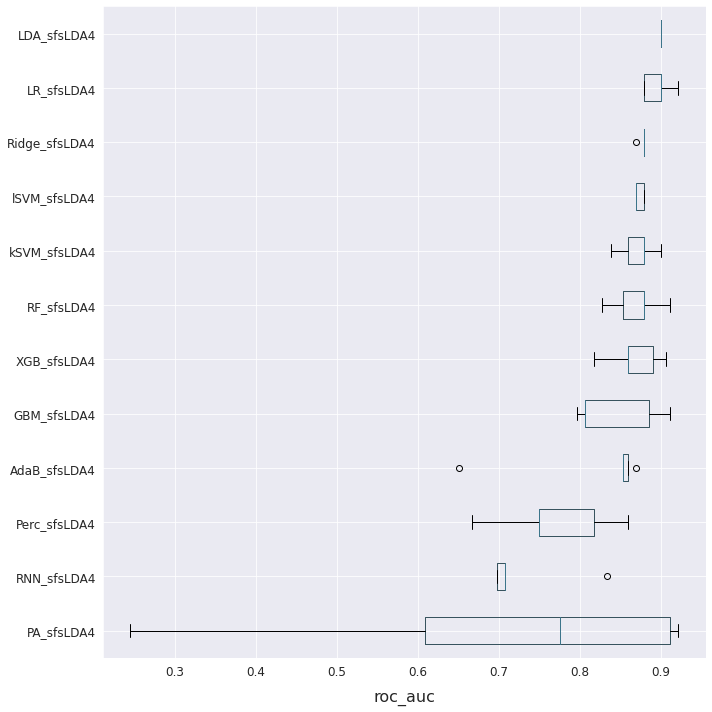

In [15]:
atom2.plot_results()

In [ ]:
atom2.features

['CAVRDSNYQLIW', 'CVVSDRGSTLGRLYF', 'CAVLDSNYQLIW', 'CASSLGETQYF']

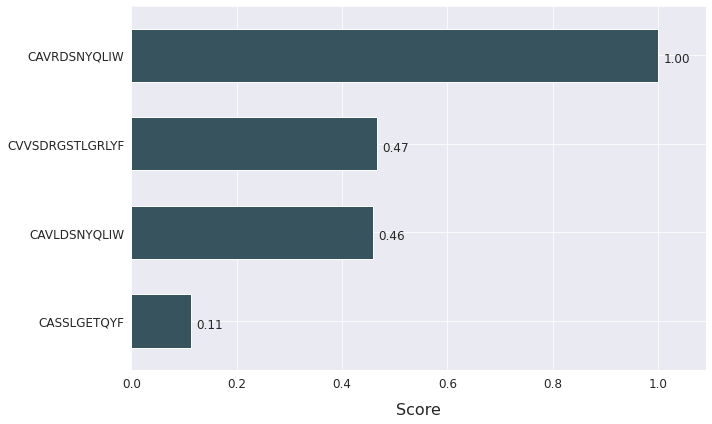

In [40]:
atom2.winner.plot_feature_importance() #filename="feature_importance_4f.pdf"

In [41]:
atom2.winner.best_params

{'solver': 'eigen', 'shrinkage': 0.5}

In [49]:
atom2.winner.estimator.coef_

array([[-444.81257986, -207.2569352 , -204.11882311,   49.94163505]])

atom winner analysis

In [17]:
# keep probabilities for the positive outcome only
yhat = atom2.winner.predict_proba(atom2.X)[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(atom2.y, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))


Performing feature selection ...
 --> SFS selected 4 features from the dataset.
   >>> Dropping feature CAAGGSQGNLIF.
   >>> Dropping feature CASSIRSSYEQYF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping feature CAVNNARLMF.
   >>> Dropping feature CAAKEGYSTLTF.
   >>> Dropping feature CAFKAAGNKLTF.
   >>> Dropping feature CAGGGSQGNLIF.
   >>> Dropping feature CAVMDSNYQLIW.
   >>> Dropping feature CILDNNNDMRF.
   >>> Dropping feature CASSLAPGATNEKLFF.
   >>> Dropping feature CADRGSTLGRLYF.
   >>> Dropping feature CASGGSYIPTF.
Best Threshold=0.522430


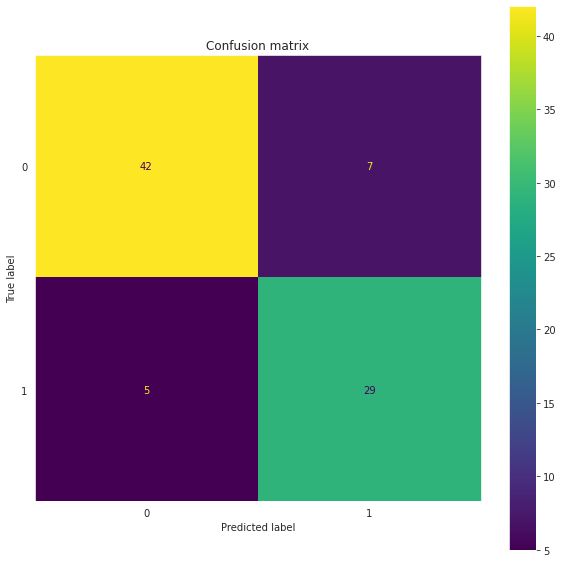

In [18]:
y_pred = (yhat > best_thresh).astype('float')
cm = confusion_matrix(atom2.y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.grid(False)
plt.title('Confusion matrix')

#plt.savefig("cm_full_dataset_4f.pdf", transparent= True)
plt.show()

In [22]:
accuracy = accuracy_score(atom2.y, y_pred)
F1 = f1_score(atom2.y, y_pred)
precision = precision_score(atom2.y, y_pred)
recall = recall_score(atom2.y, y_pred)
roc_auc = roc_auc_score(atom2.y, atom2.LDA_sfsLDA4.decision_function(atom2.X))

print(f'Accuracy={accuracy:.3f}\nF1={F1:.3f}\nPrecision={precision:.3f}\nrecall={recall:.3f}\nauc={roc_auc:.3f}')


Performing feature selection ...
 --> SFS selected 4 features from the dataset.
   >>> Dropping feature CAAGGSQGNLIF.
   >>> Dropping feature CASSIRSSYEQYF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping feature CAVNNARLMF.
   >>> Dropping feature CAAKEGYSTLTF.
   >>> Dropping feature CAFKAAGNKLTF.
   >>> Dropping feature CAGGGSQGNLIF.
   >>> Dropping feature CAVMDSNYQLIW.
   >>> Dropping feature CILDNNNDMRF.
   >>> Dropping feature CASSLAPGATNEKLFF.
   >>> Dropping feature CADRGSTLGRLYF.
   >>> Dropping feature CASGGSYIPTF.
Accuracy=0.855
F1=0.829
Precision=0.806
recall=0.853
auc=0.926


In [20]:
# evaluation on test set
atom2.winner.evaluate(threshold=best_thresh).to_frame().T

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
LDA_sfsLDA4,0.85,0.866567,0.854167,0.823529,0.7,0.697518,0.777778,0.875,0.901042


In [21]:
# which samples were mistakenly tagged as OC
FP_indices = [i for i in range(len(atom.y_test)) if atom.y_test.to_numpy()[i] == 0 and y_pred[i] == 1]
FP = [atom.y_test.index[i] for i in FP_indices]
FP


['24_A_B_H', '1_A_B_H', '14_A_B_H', '17_A_B_H', '50_A_B_H', '25_A_B_H']

Create ROC curve for LDA on 9 splits of the data with 4 features.

In [32]:
atom2.branch = "sfsLDA_4" 

Switched to branch sfsLDA_4.


1
<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (83, 5)
Memory: 3.45 kB
Scaled: False
Outlier values: 6 (1.9%)
Duplicate samples: 18 (21.7%)
-------------------------------------
Train set size: 63
Test set size: 20
-------------------------------------
|   |    dataset |      train |       test |
| - | ---------- | ---------- | ---------- |
| 0 |   49 (1.4) |   37 (1.4) |   12 (1.5) |
| 1 |   34 (1.0) |   26 (1.0) |    8 (1.0) |


Training ========================= >>
Models: LDA
Metric: roc_auc


Running BO for Linear Discriminant Analysis...
| call             |  solver | shrinkage | roc_auc | best_roc_auc |    time | total_time |
| ---------------- | ------- | --------- | ------- | ------------ | ------- | ---------- |
| Initial point 1  |   eigen |       1.0 |  0.7778 |       0.7778 |  0.021s |     0.031s |
| Initial point 2  |     svd |       --- |  0.9683 |       0.9683 |  0.014s |     0.902s

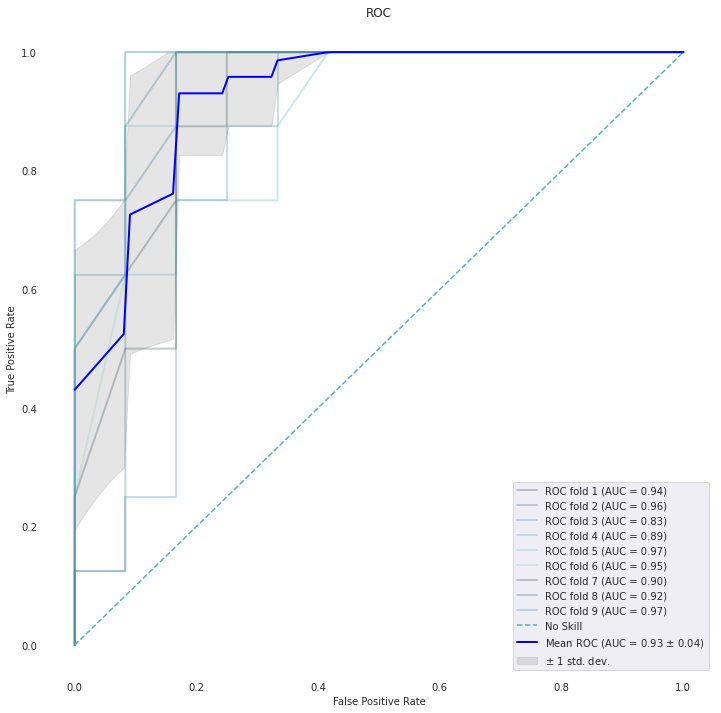

In [34]:
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(111)


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

for x in range(1,10):
    print(x)
    atom = ATOMClassifier(atom2.X, y=atom2.y, test_size=(20/83), verbose=2, warnings=False, random_state = x)
    atom.run(models=["LDA"], 
         n_calls=50,
         n_initial_points=10,
         metric="AUC",
         n_bootstrap=5)

    # keep probabilities for the positive outcome only
    yhat = atom.winner.predict_proba_test[:, 1]
    # calculate roc curves
    fpr, tpr, threshold = roc_curve(atom.y_test, yhat)
    tprs.append(interp(mean_fpr, fpr, tpr)) 
    auc_score = roc_auc_score(atom.y_test, yhat)
    aucs.append(auc_score)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (x, auc_score))


plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, lw=2, alpha=1, color='blue', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

std_tpr = np.std(tprs, axis=0)
tprs_lower = mean_tpr - std_tpr
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color="grey", alpha=0.2, label=r"$\pm$ 1 std. dev.",)

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC')
ax.legend()
ax.set_facecolor('w')
plt.show()
#plt.savefig("roc_4f.pdf", transparent= True)